In [74]:
!pip install keras-tuner
!pip install scikeras
!pip install --upgrade scikeras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [54]:
data = pd.read_csv('/content/loan-10k.lrn.csv')
final_X_test = pd.read_csv('/content/loan-10k.tes.csv')
final_Y_test = pd.read_csv('/content/loan-10k.sol.ex.csv')

y_train =  pd.DataFrame( data['grade'])
X_train =  pd.DataFrame( data.drop(['grade' , 'ID'], axis=1))
final_X_test =  pd.DataFrame( final_X_test.drop(['ID'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)


In [3]:
# data.head()

There is not any missing value in the dataset.

## Decision Tree
in this section I used decision tree method. inorder to find the best model I have used Grid search and consider a variety of parameters, 72. Finally I used Cross-Validation. with the precentage of 20.

####  Basic Preprocessing



In [55]:
from re import X
le = LabelEncoder()
encoder = OneHotEncoder()
#  for the features below we can use Label encoder, they seem ordinal
columns_to_transform = [
    'term', 'emp_length', 'verification_status', 'loan_status',
    'purpose', 'initial_list_status', 'application_type',
    'disbursement_method', 'debt_settlement_flag','home_ownership','addr_state'
]

for column in columns_to_transform:
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.fit_transform(X_test[column])
    final_X_test[column] = le.fit_transform(final_X_test[column])




# We can drop the columns 'pymnt_plan' and 'addr_state' beacuse they do not have any useful information
X_train = X_train.drop('pymnt_plan', axis=1)
X_train = X_train.drop('hardship_flag', axis=1)
final_X_test = final_X_test.drop('pymnt_plan', axis=1)
final_X_test = final_X_test.drop('hardship_flag', axis=1)

X_test = X_test.drop('pymnt_plan', axis=1)
X_test = X_test.drop('hardship_flag', axis=1)


#### Model With Cross-Validation

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [46]:
results = pd.DataFrame(grid_search.cv_results_)
results_df = results[['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf',
                      'param_criterion', 'mean_test_score', 'std_test_score', 'rank_test_score']]
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

print("Top 5 parameter combinations by mean test score:")
print(results_df.head())

Top 5 parameter combinations by mean test score:
   param_max_depth  param_min_samples_split  param_min_samples_leaf  \
63            None                        2                       1   
35            None                       10                       4   
33            None                        2                       4   
34            None                        5                       4   
69            None                        2                       4   

   param_criterion  mean_test_score  std_test_score  rank_test_score  
63         entropy         0.986556        0.003131                1  
35            gini         0.986444        0.001912                2  
33            gini         0.986111        0.001892                3  
34            gini         0.986111        0.001892                3  
69         entropy         0.986000        0.002205                5  


In the cell below, there is the results of a veriety of parameteres setting.

In [47]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.174910,0.003950,0.010984,0.000975,gini,3,1,2,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.869444,0.856667,0.870556,0.868333,0.870556,0.867111,0.005287,55
1,0.177186,0.008225,0.010123,0.000049,gini,3,1,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.869444,0.856667,0.870556,0.868333,0.870556,0.867111,0.005287,55
2,0.175535,0.004545,0.010532,0.000535,gini,3,1,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.869444,0.856667,0.870556,0.868333,0.870556,0.867111,0.005287,55
3,0.213722,0.023159,0.013781,0.006524,gini,3,2,2,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.869444,0.856667,0.870556,0.868333,0.870556,0.867111,0.005287,55
4,0.176664,0.007057,0.012124,0.003374,gini,3,2,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.869444,0.856667,0.870556,0.868333,0.870556,0.867111,0.005287,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.423355,0.008721,0.010630,0.000589,entropy,None,2,5,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.981111,0.981667,0.986667,0.988889,0.987222,0.985111,0.003131,10
68,0.431338,0.019025,0.014384,0.007546,entropy,None,2,10,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.981667,0.982222,0.986667,0.988333,0.987778,0.985333,0.002824,8
69,0.537797,0.092633,0.014057,0.007794,entropy,None,4,2,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.982222,0.985556,0.988889,0.986111,0.987222,0.986000,0.002205,5
70,0.727068,0.080477,0.017814,0.005557,entropy,None,4,5,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.982222,0.985556,0.988889,0.986111,0.987222,0.986000,0.002205,5


In [48]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

Best Model Accuracy: 0.988


In [49]:
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9882967400541584
Recall: 0.988
F1 Score: 0.9880800542406357


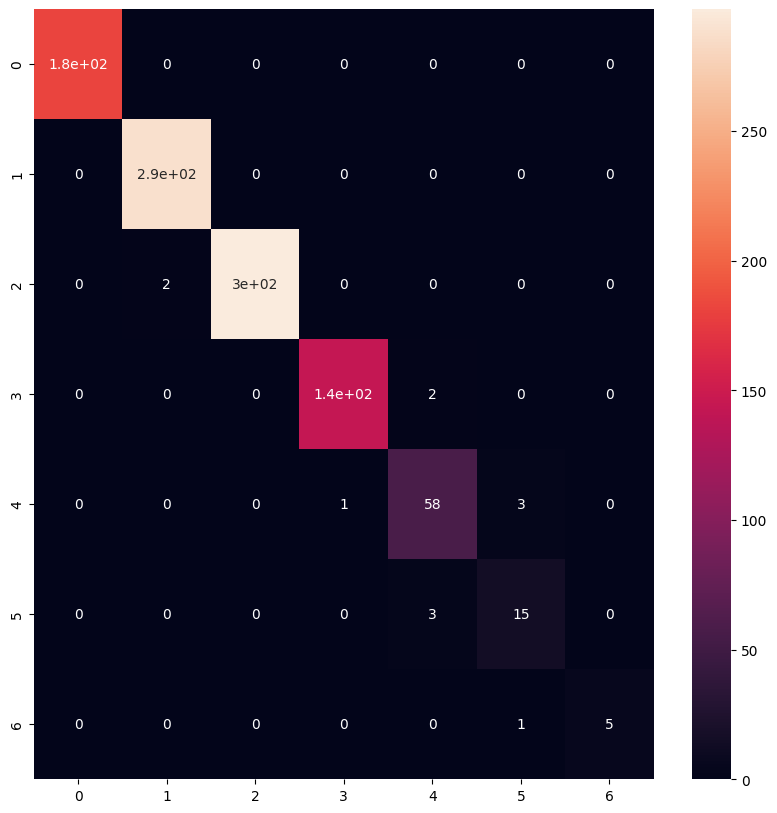

In [50]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [56]:
final_Y_test["grade"] = best_model.predict(final_X_test)
final_Y_test.to_csv('final_Y_test.csv', index=False)

#### Another Parameter Settings 1

In [57]:
# using a model with {'criterion': 'gini', 'max_depth': 3} the information of this exist above in results data frame
# it has the lowest accuracy
chosen_params = results.loc[1, 'params']
chosen_params


{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [58]:
model = DecisionTreeClassifier(**chosen_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Model Accuracy: 0.868
Precision: 0.852967926141161
Recall: 0.868
F1 Score: 0.8589329095048978


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


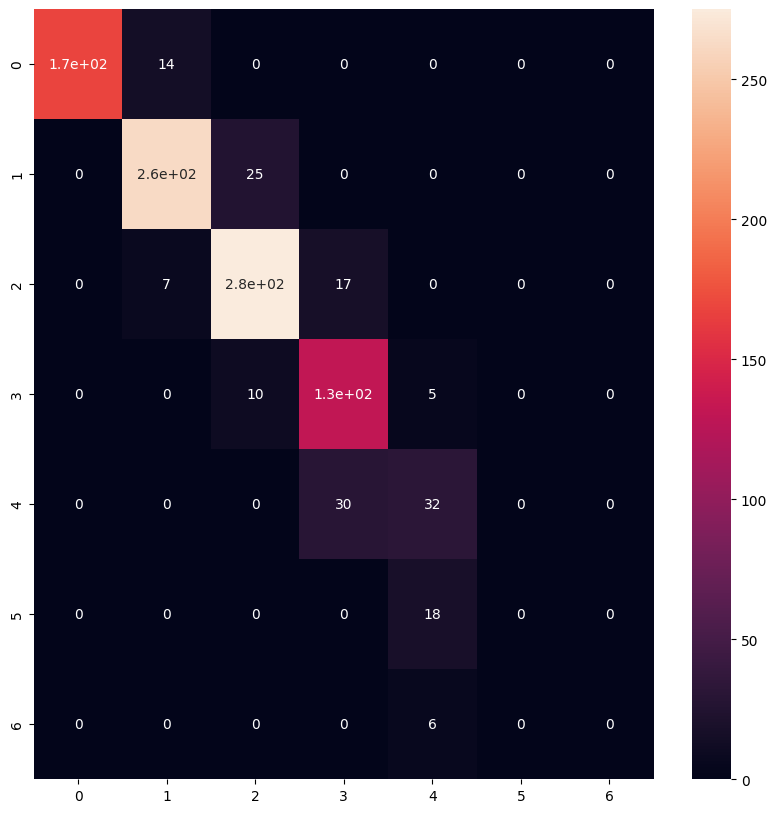

In [59]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

#### Another Parameter setting 2

In [60]:
# using a model with {'criterion': 'entropy', 'max_depth': 5} the information of this exist above in results data frame
chosen_params = results.loc[53, 'params']
chosen_params

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [61]:
model = DecisionTreeClassifier(**chosen_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Model Accuracy: 0.937
Precision: 0.9449644859977736
Recall: 0.937
F1 Score: 0.9386498727442107


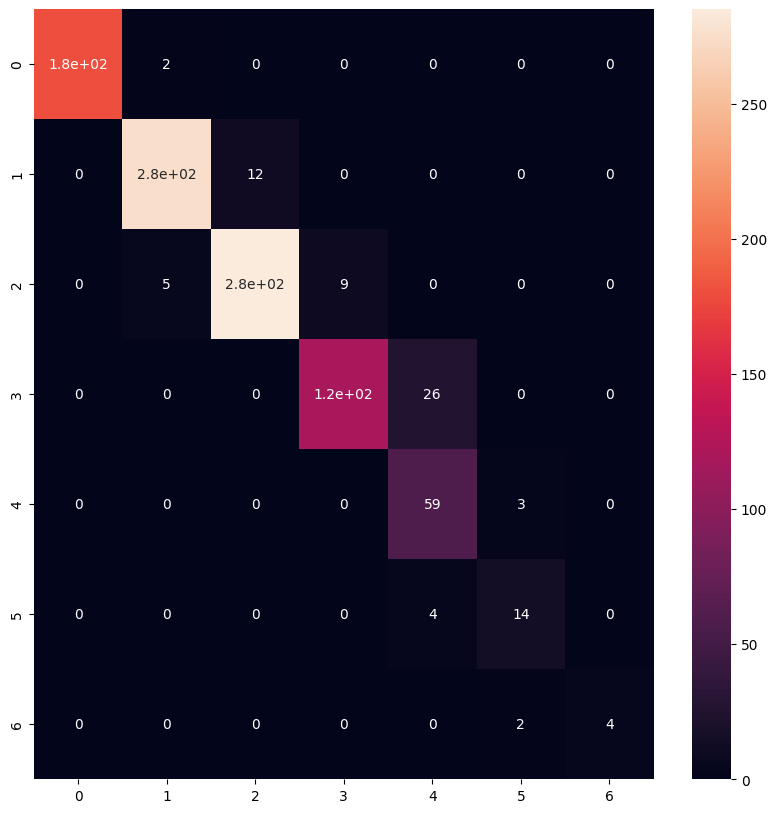

In [62]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

#### Model with Holdout

In [63]:
from sklearn.model_selection import PredefinedSplit
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

test_fold = [-1] * int(len(X_train) * 0.8) + [0] * int(len(X_train) * 0.2)
ps = PredefinedSplit(test_fold)
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=ps,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 1 folds for each of 72 candidates, totalling 72 fits


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [64]:
results = pd.DataFrame(grid_search.cv_results_)
results_df = results[['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf',
                      'param_criterion', 'mean_test_score', 'std_test_score', 'rank_test_score']]
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

print("Top 5 parameter combinations by mean test score:")
print(results_df.head())

Top 5 parameter combinations by mean test score:
   param_max_depth  param_min_samples_split  param_min_samples_leaf  \
33            None                        2                       4   
34            None                        5                       4   
35            None                       10                       4   
64            None                        5                       1   
63            None                        2                       1   

   param_criterion  mean_test_score  std_test_score  rank_test_score  
33            gini         0.989444             0.0                1  
34            gini         0.989444             0.0                1  
35            gini         0.989444             0.0                1  
64         entropy         0.988333             0.0                4  
63         entropy         0.988333             0.0                4  


In [65]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.175876,0.0,0.012123,0.0,gini,3,1,2,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.873889,0.873889,0.0,55
1,0.183208,0.0,0.012855,0.0,gini,3,1,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.873889,0.873889,0.0,55
2,0.181069,0.0,0.010013,0.0,gini,3,1,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.873889,0.873889,0.0,55
3,0.180122,0.0,0.012192,0.0,gini,3,2,2,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.873889,0.873889,0.0,55
4,0.172369,0.0,0.011009,0.0,gini,3,2,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.873889,0.873889,0.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.468640,0.0,0.010460,0.0,entropy,None,2,5,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.987778,0.987778,0.0,7
68,0.412047,0.0,0.010154,0.0,entropy,None,2,10,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.987778,0.987778,0.0,7
69,0.402086,0.0,0.010395,0.0,entropy,None,4,2,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.987222,0.987222,0.0,9
70,0.415135,0.0,0.010118,0.0,entropy,None,4,5,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.987222,0.987222,0.0,9


In [66]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

Best Model Accuracy: 0.987


In [67]:
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9873612091781612
Recall: 0.987
F1 Score: 0.9870832024478269


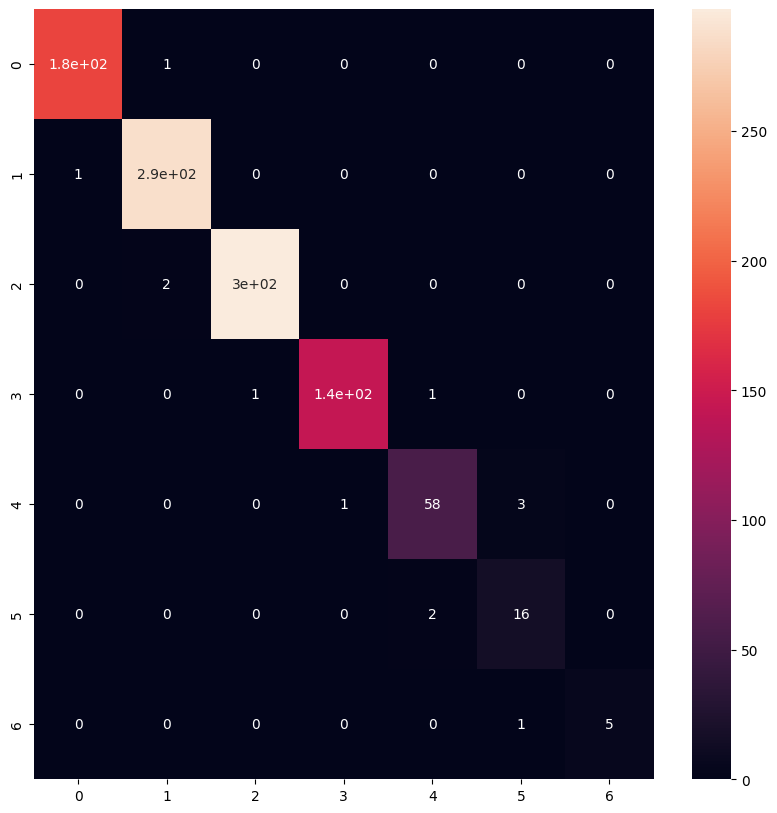

In [68]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

#### Another Parameters Setting 1

In [69]:
# using a model with {'criterion': 'gini', 'max_depth': 3} the information of this exist above in results data frame
chosen_params = results.loc[1, 'params']
chosen_params

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [70]:
model = DecisionTreeClassifier(**chosen_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Model Accuracy: 0.868
Precision: 0.852967926141161
Recall: 0.868
F1 Score: 0.8589329095048978


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


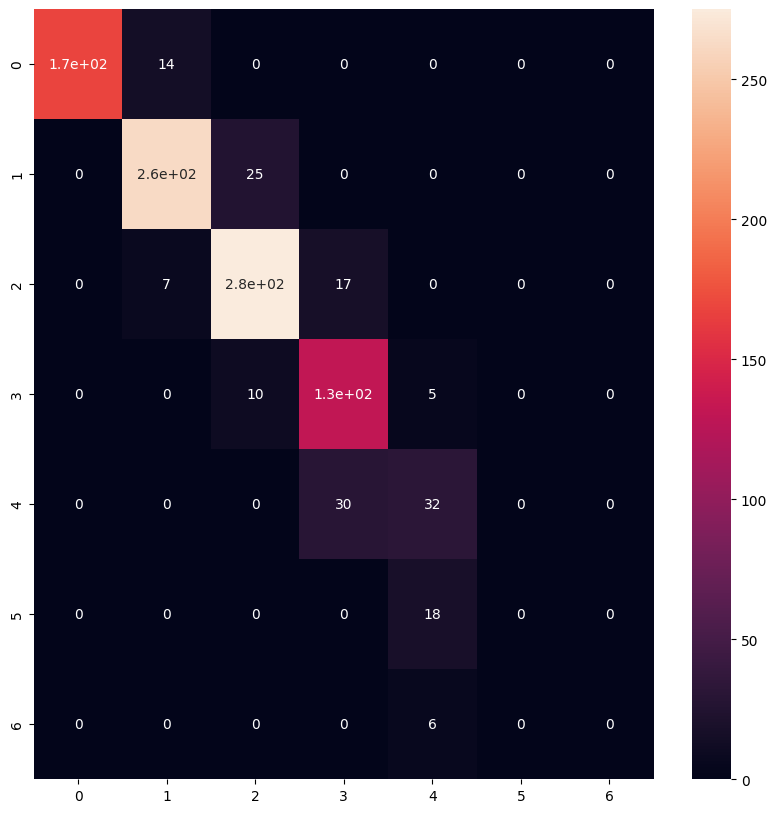

In [71]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

#### Another Parameter Setting 2

In [72]:
# using a model with {'criterion': 'entropy', 'max_depth': 5} the information of this exist above in results data frame
chosen_params = results.loc[53, 'params']
chosen_params

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [73]:
model = DecisionTreeClassifier(**chosen_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Model Accuracy: 0.937
Precision: 0.9449644859977736
Recall: 0.937
F1 Score: 0.9386498727442107


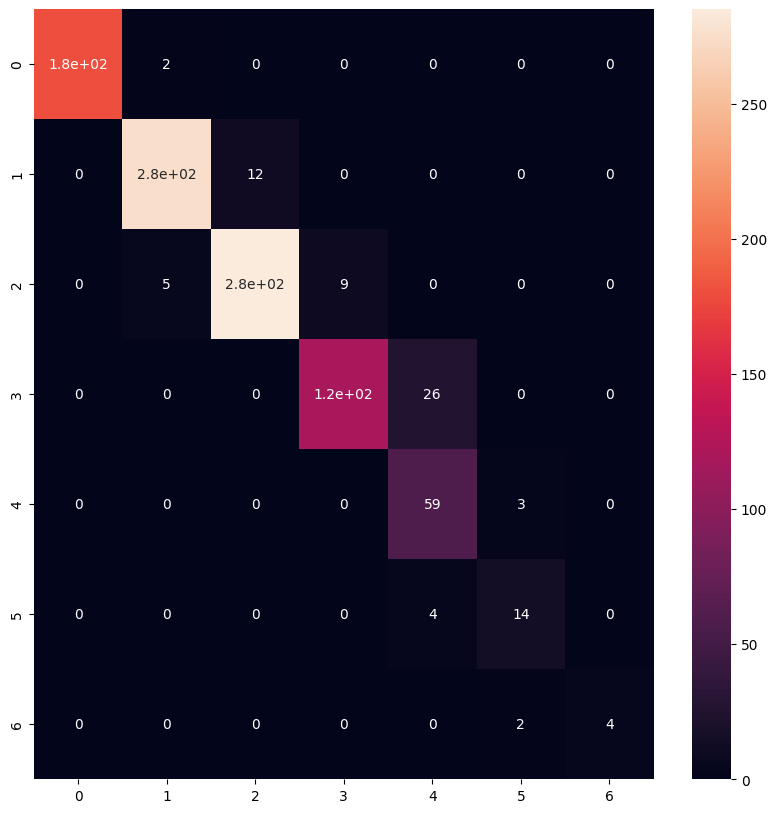

In [74]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

## Neural Network

##### Basic Preprocessing

In [ ]:
from re import X
from sklearn.preprocessing import StandardScaler


le = LabelEncoder()
encoder = OneHotEncoder(handle_unknown='ignore')
#  for the features below we can use Label encoder, they seem ordinal
columns_to_transform = [
    'term', 'emp_length', 'verification_status', 'loan_status',
    'purpose', 'initial_list_status', 'application_type',
    'disbursement_method', 'debt_settlement_flag' ,'addr_state'
]

for column in columns_to_transform:
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])


y_train["grade"] = le.fit_transform(y_train["grade"])
y_test["grade"] = le.fit_transform(y_test["grade"])

# We can drop the columns 'pymnt_plan' and 'addr_state' beacuse they do not have any useful information
X_train = X_train.drop('pymnt_plan', axis=1)
X_train = X_train.drop('hardship_flag', axis=1)

X_test = X_test.drop('pymnt_plan', axis=1)
X_test = X_test.drop('hardship_flag', axis=1)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

encoded = encoder.fit_transform(X_train[['home_ownership']])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(['home_ownership']))
X_train = pd.concat([X_train, encoded_df], axis=1)
X_train = X_train.drop('home_ownership', axis=1)


encoded = encoder.transform(X_test[['home_ownership']])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(['home_ownership']))
X_test = pd.concat([X_test, encoded_df], axis=1)
X_test = X_test.drop('home_ownership', axis=1)

Features = X_train.columns
Features_not_scaled = ['term', 'emp_length', 'verification_status', 'loan_status',
    'purpose', 'initial_list_status', 'application_type',
    'disbursement_method', 'debt_settlement_flag' ,'addr_state' ,"home_ownership_ANY" ,
    "home_ownership_MORTGAGE" ,	"home_ownership_OTHER" ,	"home_ownership_OWN" ,  	"home_ownership_RENT" ]

Features_scaled = [x for x in Features if x not in Features_not_scaled]
scaler = StandardScaler()
X_train[Features_scaled] = scaler.fit_transform(X_train[Features_scaled])
X_test[Features_scaled] = scaler.transform(X_test[Features_scaled])



In [ ]:
from sklearn.decomposition import PCA
number_of_components = 60
pca = PCA(n_components=number_of_components)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In this section I used a Neural Network to predict the grade. I used Keras Tuner to test it on a variety of hyperparameteres.



#### Using Cross Validation

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(max_iter=1000, early_stopping=True, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(16,16), (16,32), (16, 32 , 64), (16 , 32 , 32)],
    'activation': ['relu'],
    'solver': ['adam'],
    'learning_rate_init': [0.001, 0.01],
}

grid = GridSearchCV(
    mlp,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Model Accuracy: 0.891


In [ ]:
print(grid.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (16, 32), 'learning_rate_init': 0.01, 'solver': 'adam'}


In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8866906707482533
Recall: 0.891
F1 Score: 0.8875905814166264


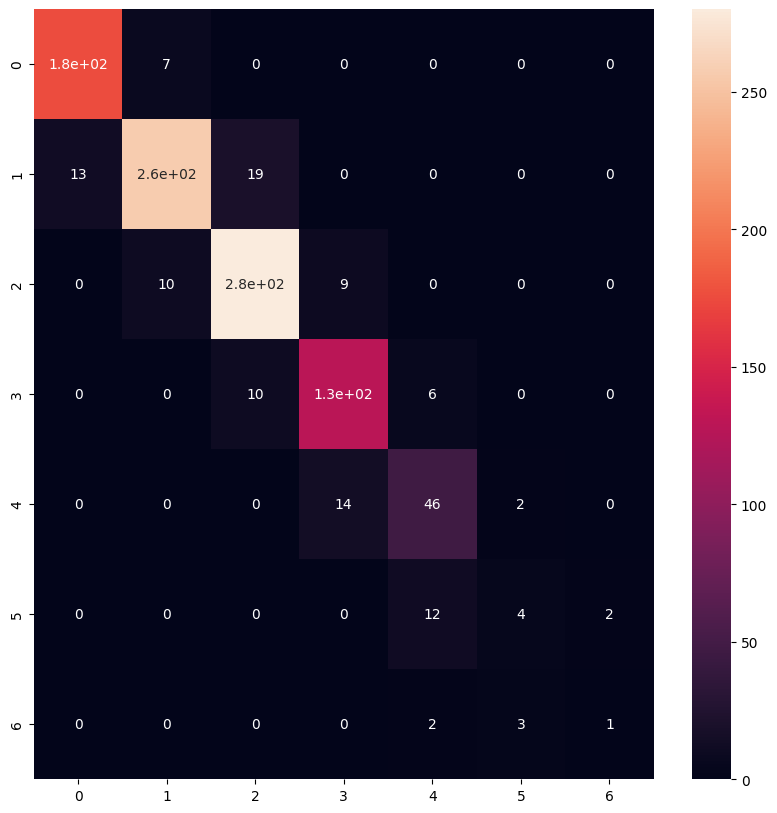

In [ ]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
print(results.head())

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.985582      0.287254         0.009019        0.003099   
1       2.096229      0.696078         0.010011        0.003600   
2       2.786564      0.339143         0.007590        0.000256   
3       1.623941      0.293374         0.007420        0.000533   
4       8.118582      2.948401         0.025720        0.005282   

  param_activation param_hidden_layer_sizes  param_learning_rate_init  \
0             relu                 (16, 16)                     0.001   
1             relu                 (16, 16)                     0.010   
2             relu                 (16, 32)                     0.001   
3             relu                 (16, 32)                     0.010   
4             relu             (16, 32, 64)                     0.001   

  param_solver                                             params  \
0         adam  {'activation': 'relu', 'hidden_layer_sizes': (...   
1         adam  {'ac

In [ ]:
results = pd.DataFrame(grid.cv_results_)
results_df = results[['param_activation', 'param_hidden_layer_sizes', 'param_learning_rate_init',
                      'param_solver']]
print(results_df.head())

  param_activation param_hidden_layer_sizes  param_learning_rate_init  \
0             relu                 (16, 16)                     0.001   
1             relu                 (16, 16)                     0.010   
2             relu                 (16, 32)                     0.001   
3             relu                 (16, 32)                     0.010   
4             relu             (16, 32, 64)                     0.001   

  param_solver  
0         adam  
1         adam  
2         adam  
3         adam  
4         adam  


#### Another Parameter Settings 1

In [ ]:
chosen_params = results.loc[5, 'params']
chosen_params


{'activation': 'relu',
 'hidden_layer_sizes': (16, 32, 64),
 'learning_rate_init': 0.01,
 'solver': 'adam'}

In [ ]:
model = MLPClassifier(**chosen_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Model Accuracy: 0.906
Precision: 0.9048884026249193
Recall: 0.906
F1 Score: 0.9047136452451086


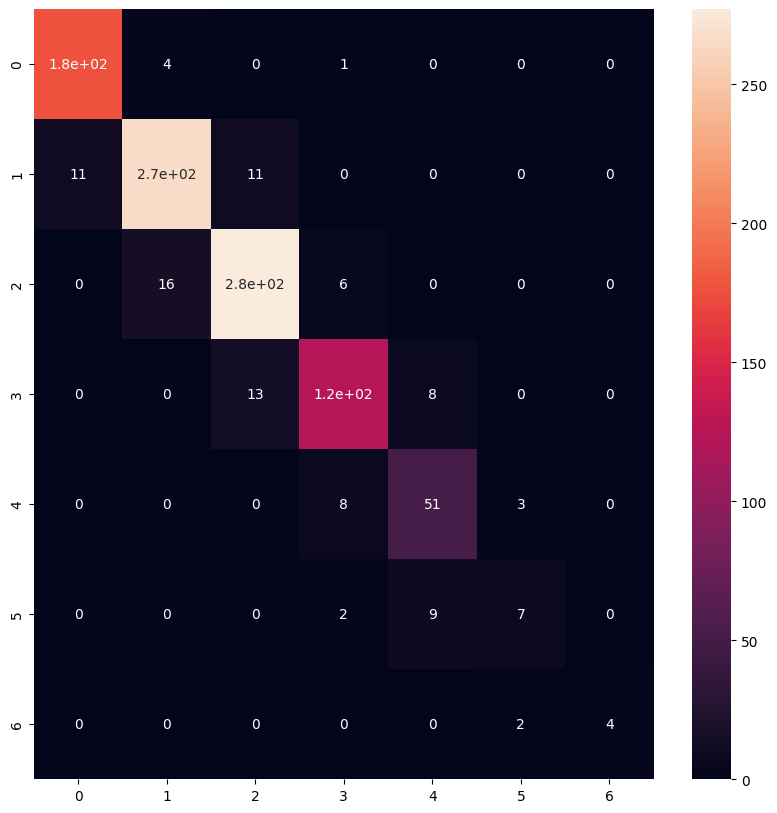

In [ ]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

##### Another Parameter settings 2

In [ ]:
chosen_params = results.loc[7, 'params']
chosen_params

{'activation': 'relu',
 'hidden_layer_sizes': (16, 32, 32),
 'learning_rate_init': 0.01,
 'solver': 'adam'}

In [ ]:
model = MLPClassifier(**chosen_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Model Accuracy: 0.881
Precision: 0.8850851275079434
Recall: 0.881
F1 Score: 0.882627476534929


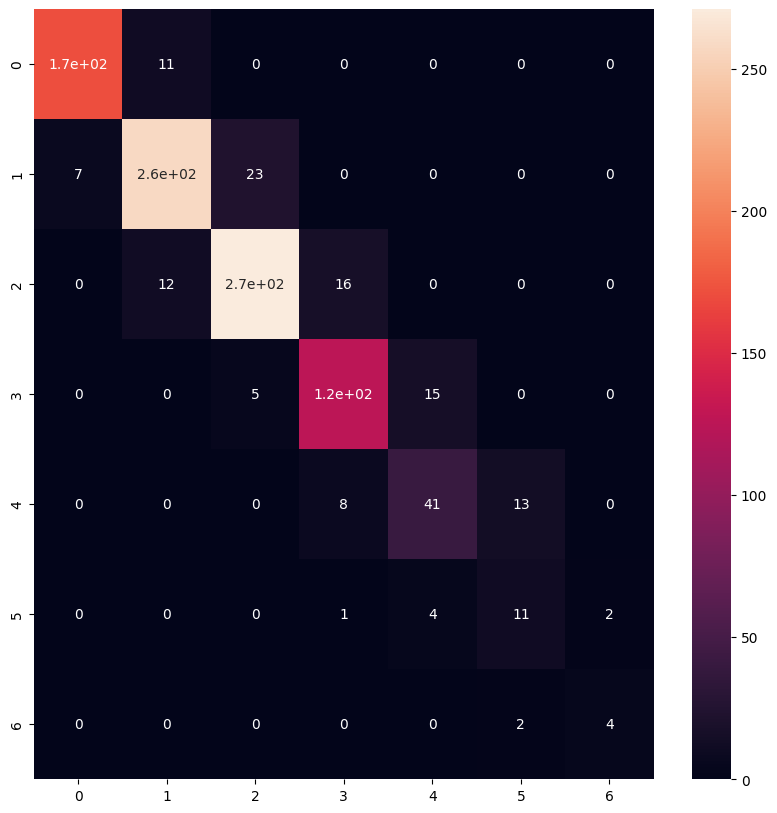

In [ ]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

#### With Holdout

In [ ]:


mlp = MLPClassifier(max_iter=1000, early_stopping=True, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(16,16), (16,32), (16, 32 , 64), (16 , 32 , 32)],
    'activation': ['relu'],
    'solver': ['adam'],
    'learning_rate_init': [0.001, 0.01],
}

test_fold = [-1] * int(len(X_train) * 0.8) + [0] * int(len(X_train) * 0.2)
ps = PredefinedSplit(test_fold)

grid = GridSearchCV(
    mlp,
    param_grid,
    cv=ps,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

Fitting 1 folds for each of 8 candidates, totalling 8 fits


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Model Accuracy: 0.894


In [ ]:
print(grid.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (16, 16), 'learning_rate_init': 0.01, 'solver': 'adam'}


In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8952671817846236
Recall: 0.894
F1 Score: 0.8941571431749084


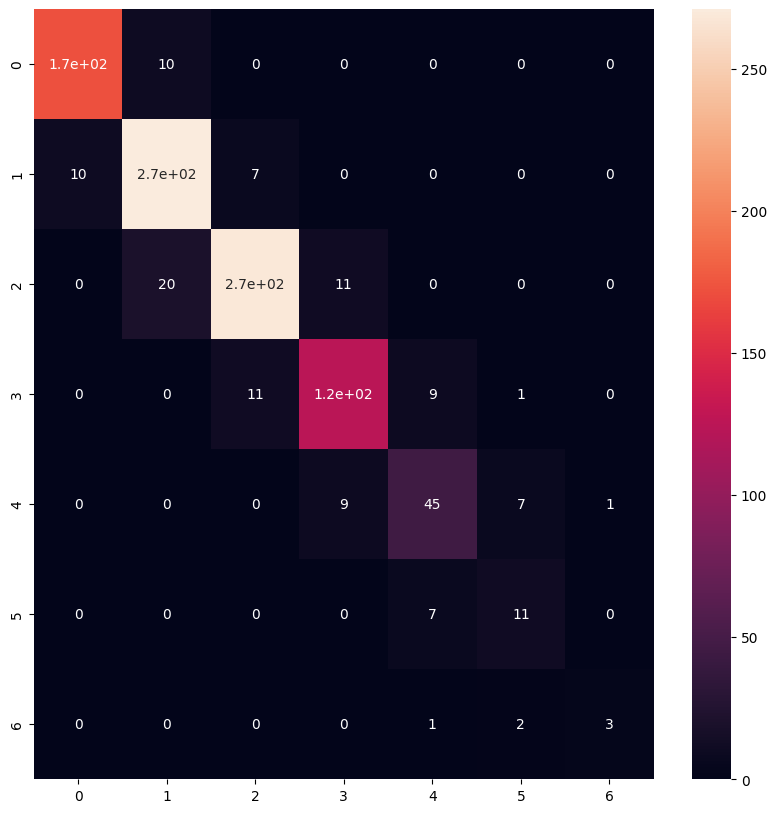

In [ ]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
results = pd.DataFrame(grid.cv_results_)
results_df = results[['param_activation', 'param_hidden_layer_sizes', 'param_learning_rate_init',
                      'param_solver']]
print(results_df.head())

  param_activation param_hidden_layer_sizes  param_learning_rate_init  \
0             relu                 (16, 16)                     0.001   
1             relu                 (16, 16)                     0.010   
2             relu                 (16, 32)                     0.001   
3             relu                 (16, 32)                     0.010   
4             relu             (16, 32, 64)                     0.001   

  param_solver  
0         adam  
1         adam  
2         adam  
3         adam  
4         adam  


#### Another Parameter Settings 1

In [ ]:
chosen_params = results.loc[5, 'params']
chosen_params

{'activation': 'relu',
 'hidden_layer_sizes': (16, 32, 64),
 'learning_rate_init': 0.01,
 'solver': 'adam'}

In [ ]:
model = MLPClassifier(**chosen_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Model Accuracy: 0.886
Precision: 0.880861575617705
Recall: 0.886
F1 Score: 0.8831209631713817


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


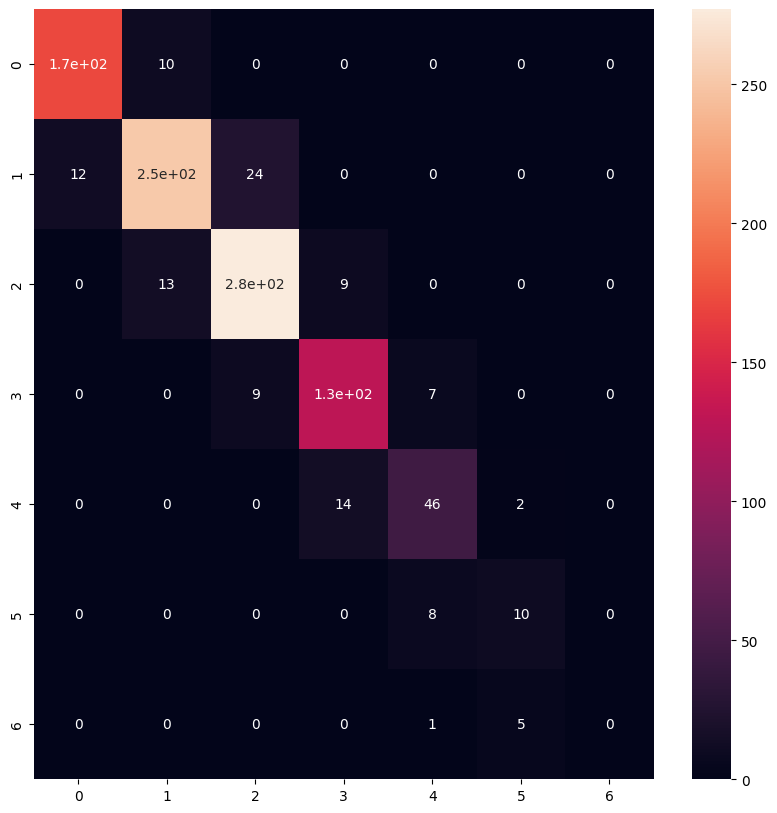

In [ ]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

#### Another Parametere Setting 2

In [ ]:
chosen_params = results.loc[7, 'params']
chosen_params

{'activation': 'relu',
 'hidden_layer_sizes': (16, 32, 32),
 'learning_rate_init': 0.01,
 'solver': 'adam'}

In [ ]:
model = MLPClassifier(**chosen_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Model Accuracy: 0.908
Precision: 0.9077021956612387
Recall: 0.908
F1 Score: 0.9058364631356187


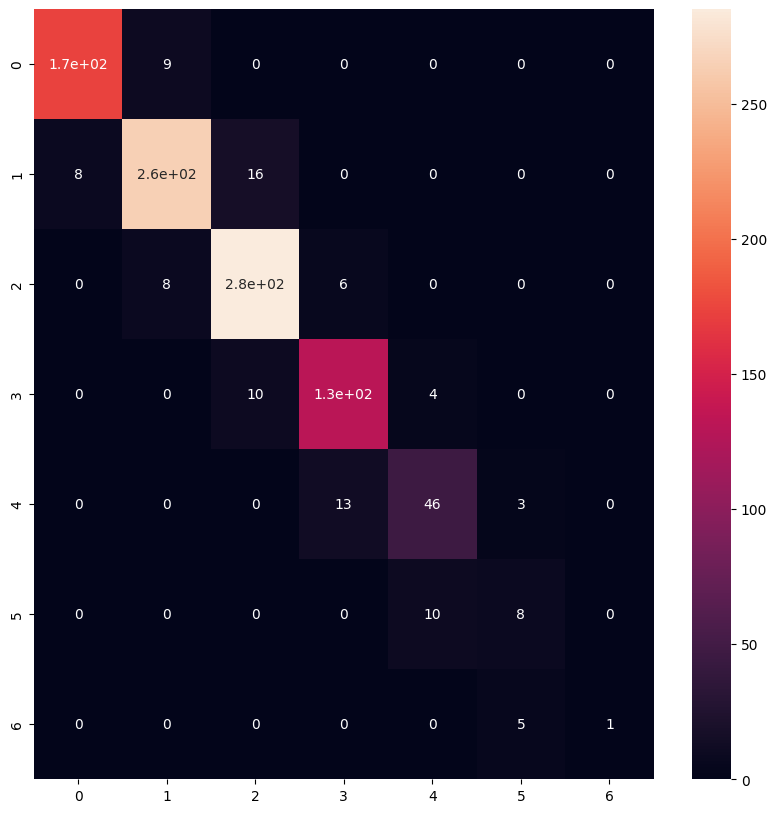

In [ ]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

## Random Forest (Ensumble Methods)

##### Preprocessing

In [31]:
from re import X
le = LabelEncoder()
encoder = OneHotEncoder()
#  for the features below we can use Label encoder, they seem ordinal
columns_to_transform = [
    'term', 'emp_length', 'verification_status', 'loan_status',
    'purpose', 'initial_list_status', 'application_type',
    'disbursement_method', 'debt_settlement_flag','home_ownership','addr_state'
]

for column in columns_to_transform:
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.fit_transform(X_test[column])

# We can drop the columns 'pymnt_plan' and 'addr_state' beacuse they do not have any useful information
X_train = X_train.drop('pymnt_plan', axis=1)
X_train = X_train.drop('hardship_flag', axis=1)

X_test = X_test.drop('pymnt_plan', axis=1)
X_test = X_test.drop('hardship_flag', axis=1)

##### Model with Cross Validation

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

rf_model = RandomForestClassifier(random_state=42)

# Corrected param_grid
param_grid = {
    'n_estimators': [10, 50, 100, 200]  # Directly specify n_estimators
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'n_estimators': 200}
Best Model Accuracy: 0.86


In [10]:
print(results)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.278146      0.295973         0.041996        0.016166   
1       5.738883      1.106651         0.090534        0.059151   
2       6.000832      0.639777         0.073358        0.000894   
3      11.510794      1.514247         0.133873        0.012207   

   param_n_estimators                 params  split0_test_score  \
0                  10   {'n_estimators': 10}           0.776667   
1                  50   {'n_estimators': 50}           0.841111   
2                 100  {'n_estimators': 100}           0.853889   
3                 200  {'n_estimators': 200}           0.853889   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.736667           0.765000           0.749444           0.748889   
1           0.810556           0.838333           0.840000           0.835556   
2           0.831111           0.854444           0.851667           0.852222   
3   

In [14]:
results = pd.DataFrame(grid_search.cv_results_)
results_df = results[['param_n_estimators','mean_test_score']]
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

print("Top 5 parameter combinations by mean test score:")
print(results_df.head())

Top 5 parameter combinations by mean test score:
   param_n_estimators  mean_test_score
3                 200         0.854667
2                 100         0.848667
1                  50         0.833111
0                  10         0.755333


In [15]:
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8366806373834383
Recall: 0.86
F1 Score: 0.8437173233933439


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


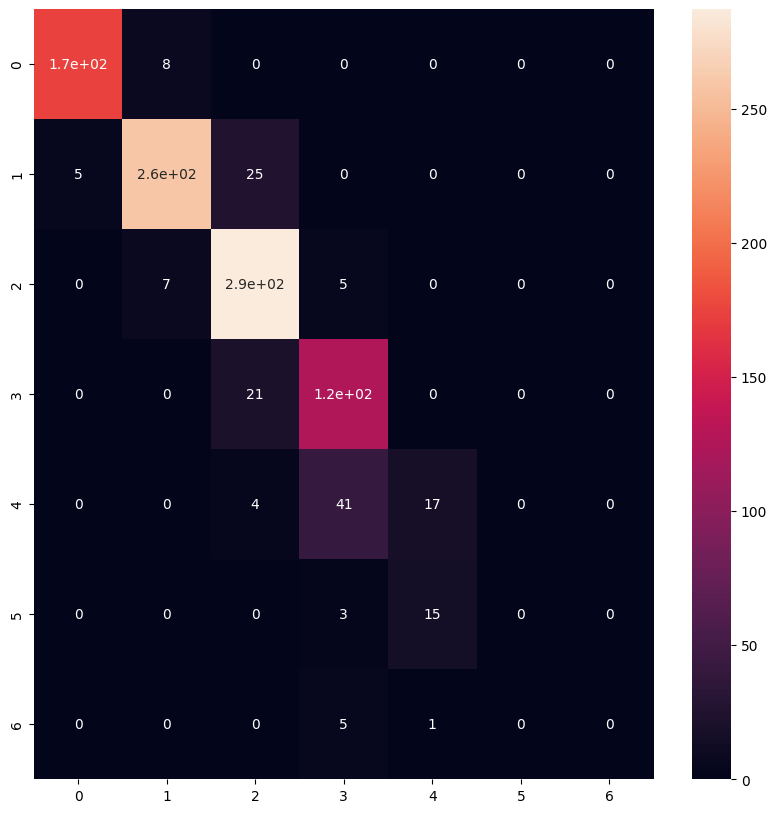

In [29]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

### Another parameter Setting

In [17]:
chosen_params = results.loc[2, 'params']
chosen_params

{'n_estimators': 100}

In [20]:
model = RandomForestClassifier(**chosen_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Accuracy: 0.843
Precision: 0.8373454607359959
Recall: 0.843
F1 Score: 0.8264658312674544


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


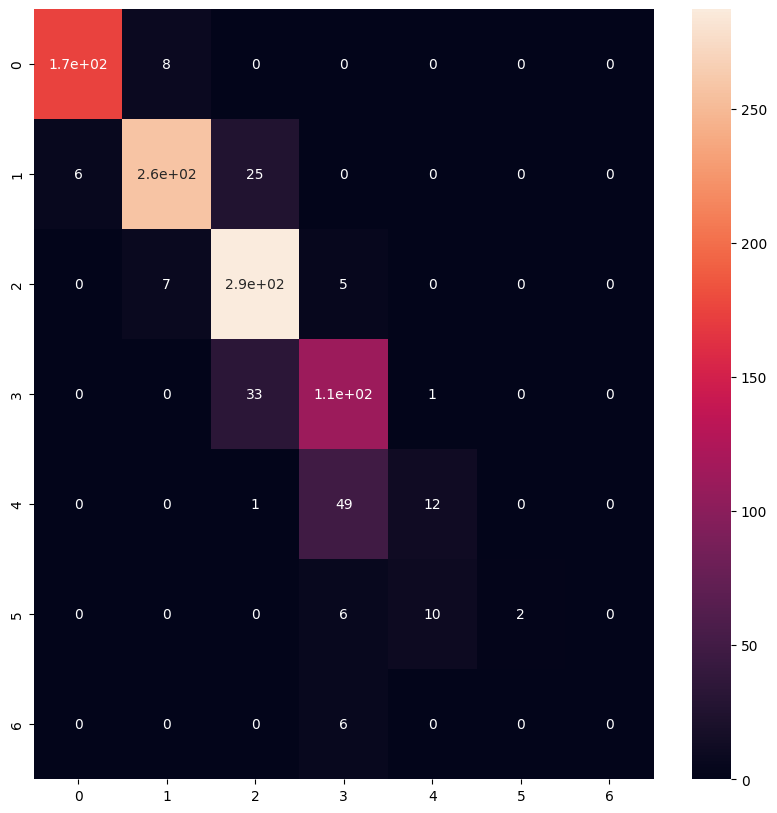

In [21]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

##### Another Parameter Settings 2 - Lowest Accuracy

In [24]:
chosen_params = results.loc[0, 'params']
chosen_params

{'n_estimators': 10}

In [25]:
model = RandomForestClassifier(**chosen_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Accuracy: 0.785
Precision: 0.7687761353086745
Recall: 0.785
F1 Score: 0.7653380224413868


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


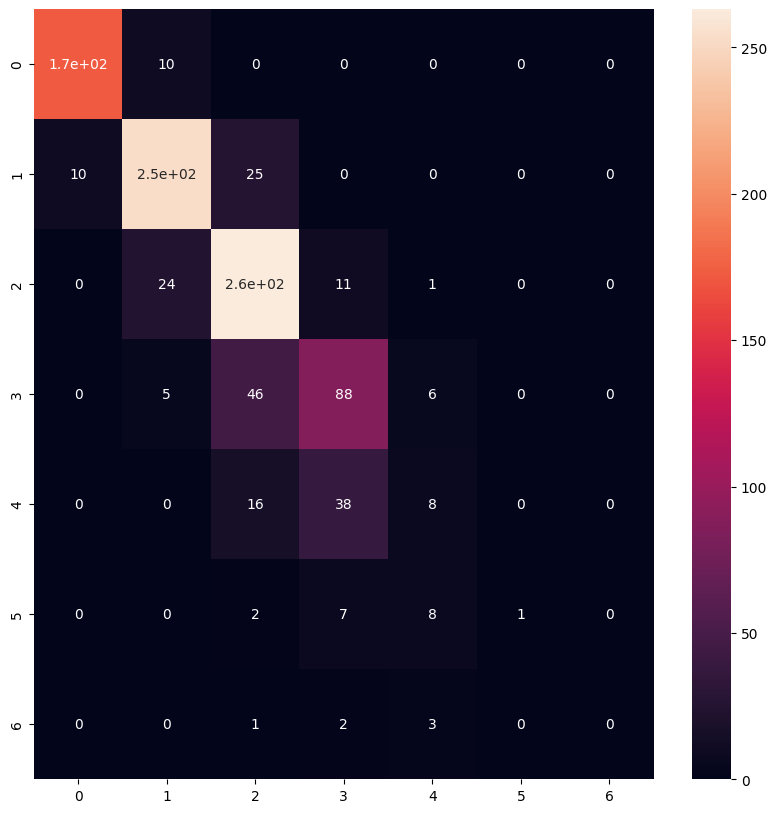

In [26]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

#### Holdout

In [33]:
from sklearn.model_selection import PredefinedSplit
rf_model = RandomForestClassifier(random_state=42)

# Corrected param_grid
param_grid = {
    'n_estimators': [10, 50, 100, 200]  # Directly specify n_estimators
}


test_fold = [-1] * int(len(X_train) * 0.8) + [0] * int(len(X_train) * 0.2)
ps = PredefinedSplit(test_fold)

grid_search = GridSearchCV(rf_model, param_grid, cv=ps, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'n_estimators': 200}
Best Model Accuracy: 0.86


In [34]:
results = pd.DataFrame(grid_search.cv_results_)
results_df = results[['param_n_estimators','mean_test_score']]
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

print("Top 5 parameter combinations by mean test score:")
print(results_df.head())

Top 5 parameter combinations by mean test score:
   param_n_estimators  mean_test_score
3                 200         0.871667
2                 100         0.867778
1                  50         0.853333
0                  10         0.759444


As You can see, this order is the same as the list were created with Cross validation.

In [35]:
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8366806373834383
Recall: 0.86
F1 Score: 0.8437173233933439


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


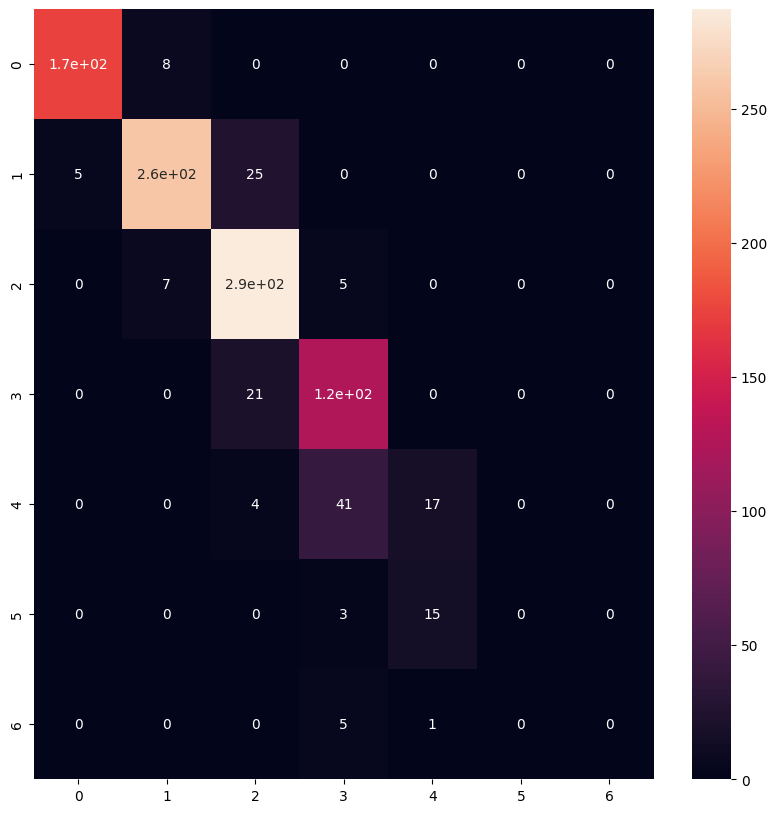

In [36]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

#### Another Parameter Settings 1

In [38]:
chosen_params = results.loc[2, 'params']
chosen_params

{'n_estimators': 100}

In [39]:
model = RandomForestClassifier(**chosen_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
# Recall
recall = recall_score(y_test, y_pred, average='weighted')
# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Accuracy: 0.846
Precision: 0.8191985485973237
Recall: 0.846
F1 Score: 0.826816279114355


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


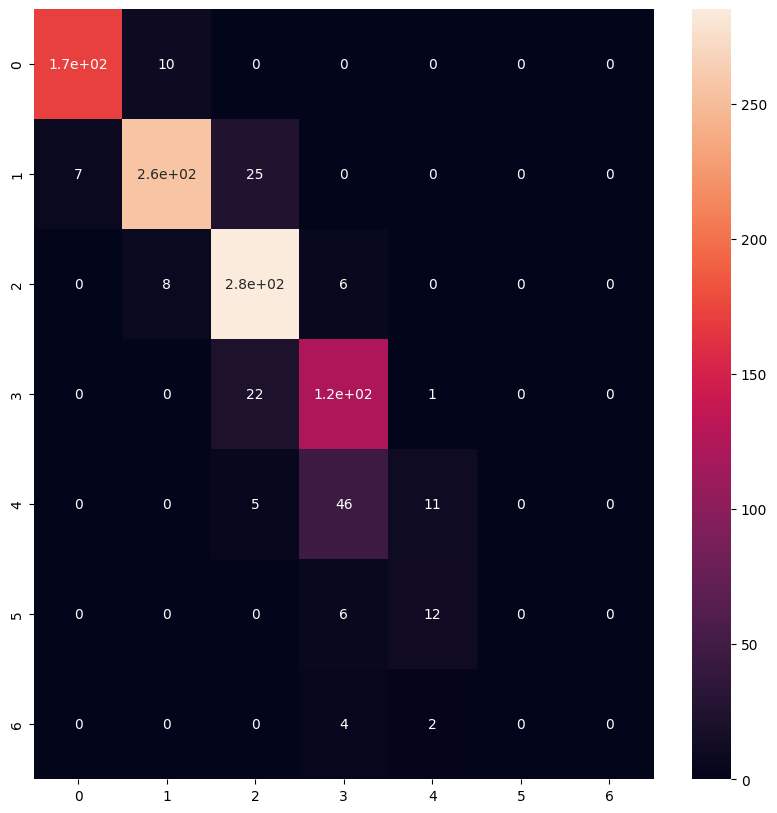

In [40]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()